# ***MLP for Binary Classification***

In [ ]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
df = read_csv(path, header=None)

In [ ]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

In [ ]:
# ensure all data are floating point values
X = X.astype('float32')

In [ ]:
# encode strings to integer
y = LabelEncoder().fit_transform(y)

In [ ]:
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(235, 34) (116, 34) (235,) (116,)


In [ ]:
# determine the number of input features
n_features = X_train.shape[1]

In [ ]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

In [ ]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.888


In [ ]:
# make a prediction
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,
       -0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

1/1 [==============================] - 0s 107ms/step
Predicted: 0.982


<ipython-input-14-15748f7ba6f1>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicted: %.3f' % yhat)


# ***MLP for Multiclass Classification***

In [ ]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv

--2024-02-26 16:56:15--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4549 (4.4K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.44K  --.-KB/s    in 0s      

2024-02-26 16:56:15 (17.5 MB/s) - ‘iris.csv’ saved [4549/4549]



In [ ]:
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
df = read_csv(path, header=None)

In [ ]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

In [ ]:
# ensure all data are floating point values
X = X.astype('float32')

In [ ]:
# encode strings to integer
y = LabelEncoder().fit_transform(y)

In [ ]:
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(100, 4) (50, 4) (100,) (50,)


In [ ]:
# determine the number of input features
n_features = X_train.shape[1]

In [ ]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

In [ ]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.940


In [ ]:
# make a prediction
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

1/1 [==============================] - 0s 69ms/step
Predicted: [[9.9924755e-01 7.5164624e-04 8.6963365e-07]] (class=0)


# ***CNN for Fashion-MNIST Clothing Classification***

In [ ]:
!wget https://github.com/zalandoresearch/fashion-mnist

--2024-02-26 17:00:51--  https://github.com/zalandoresearch/fashion-mnist
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘fashion-mnist’

fashion-mnist           [ <=>                ] 431.84K  --.-KB/s    in 0.1s    

2024-02-26 17:00:52 (3.43 MB/s) - ‘fashion-mnist’ saved [442204]



4422102/4422102 [==============================] - 0s 0us/step
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


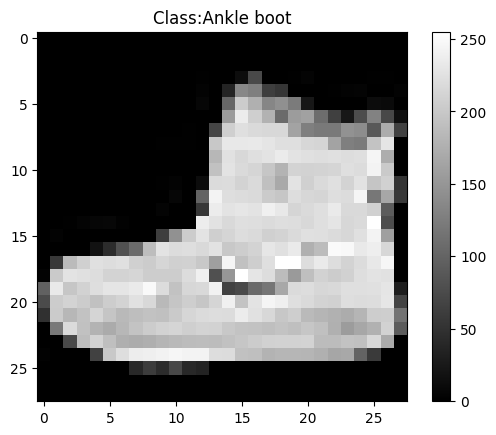

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()
print("Training images shape:",train_images.shape)
print("Training labels shape:",train_labels.shape)
print("Test images shape:",test_images.shape)
print("Test labels shape:",test_labels.shape)
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag',
             'Ankle boot']
plt.figure()
plt.imshow(train_images[0],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.title(f"Class:{class_names[train_labels[0]]}")
plt.show()